In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

#pd.set_option('display.max_columns', 100)

In [4]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

**observations:**
   * We can see there is are NO null values in the entire dataset.
   * We also cannot see any categorical values or text data in the dataset that need to modified.

### Lets check if the data is balanced or Unbalanced?

0    573518
1     21694
Name: target, dtype: int64


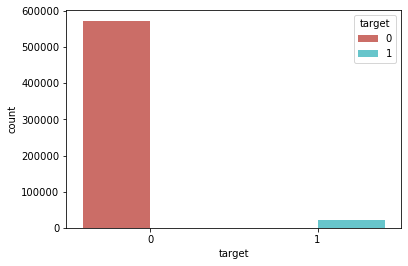

In [4]:
print(train['target'].value_counts())
sns.countplot(x='target', hue='target' ,data=train, palette="hls")
plt.show()

**Observation:**
   * As we can clearly see from the above graph, The given data is **imbalanced**.

### Let's check what are the column names of different variables and manually.

In [5]:
bin_col = []
cat_col = []
num_col = []
for i in train.columns:
    if train[i].nunique() == 2:
        bin_col.append(i)
    elif train[i].nunique() == 3:
        cat_col.append(i)
    else:
        num_col.append(i)

print(bin_col)
print('Number of Binary variables:',len(bin_col))
print('*'*50)
print(cat_col)
print('Number of numeric variables:',len(cat_col))
print('*'*50)
print(num_col)
print('Number of numeric variables:',len(num_col))

['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_02_cat', 'ps_car_08_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
Number of Binary variables: 20
**************************************************
['ps_ind_04_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_10_cat']
Number of numeric variables: 5
**************************************************
['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_05_cat', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'p

**Extracting interval variables & Ordinal variables from the columns(Variables)**

In [6]:
interval_col = []
nominal_col = []
for j in train.columns:
    if train[j].dtypes == float:
        interval_col.append(j)
    elif "cat" in j or j == "id":
        nominal_col.append(j)
        
print(interval_col)
print("Number of interval variables:",len(interval_col))
print("*"*50)
print(nominal_col)
print("Number of Ordinal variables:",len(nominal_col))

['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']
Number of interval variables: 10
**************************************************
['id', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
Number of Ordinal variables: 15


In [7]:
train[interval_col].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [8]:
train[nominal_col].describe()

,id,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,1.358943,0.416794,0.405188,8.295933,0.829948,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674
std,4.293678e+05,0.664594,0.493311,1.350642,2.508270,0.375679,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455
min,7.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000
25%,3.719915e+05,1.000000,0.000000,0.000000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,7.435475e+05,1.000000,0.000000,0.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,1.115549e+06,2.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000
max,1.488027e+06,4.000000,1.000000,6.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


In [9]:
train[bin_col].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_02_cat,ps_car_08_cat,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.829948,0.832080,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.375679,0.373796,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> * A mean in the target training data is 3.645%, It is clear sign of the **Imbalanced dataset**.
> * Also we can see from the above Pandas profiling report most of the dataset is has zeros.

## Data Visualization

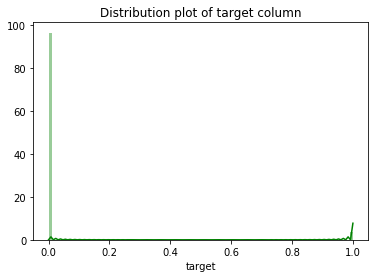

In [5]:
sns.distplot(train['target'], color='g', bins=100);
plt.title("Distribution plot of target column")
plt.show()

**Observations:**
   * Due to imbalanced dataset, we are not able to describe the variance of the target data.

### Histogram plots of all the columns.

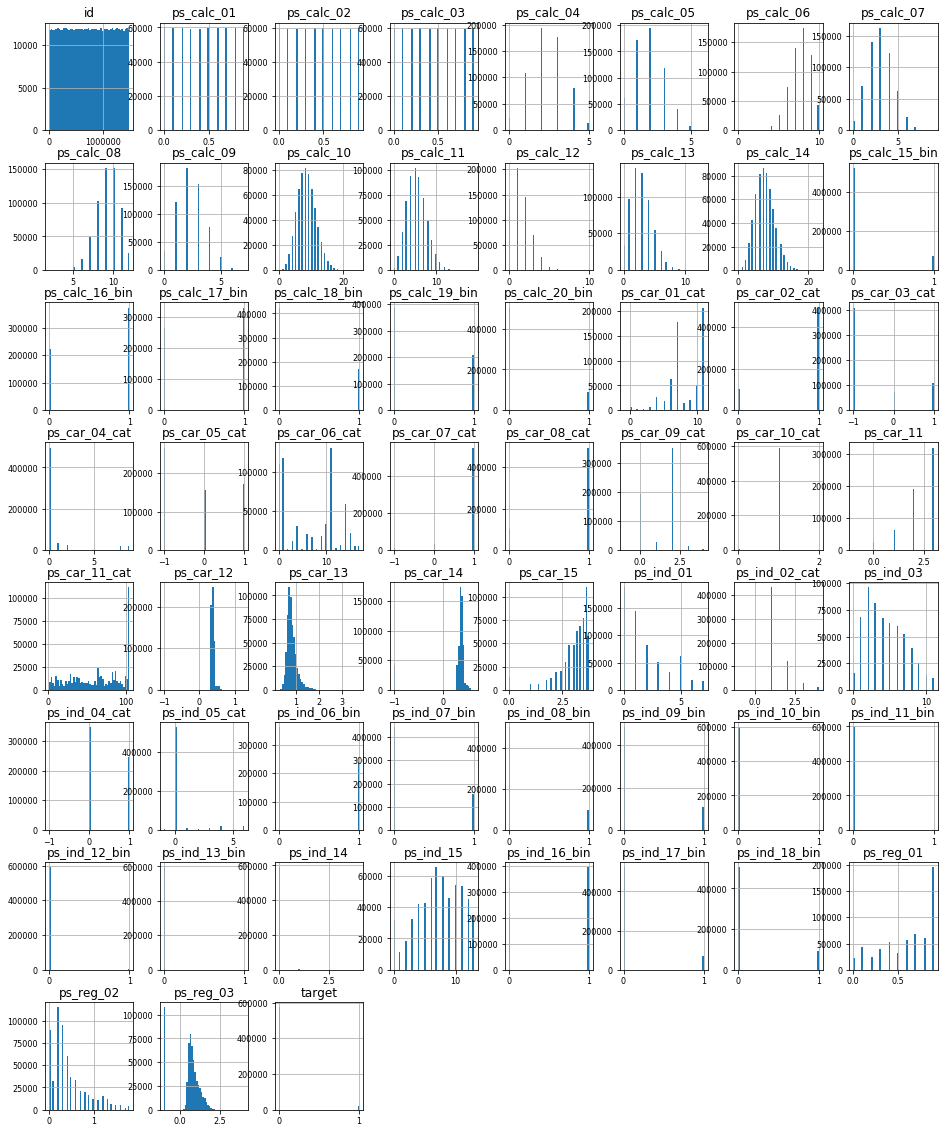

In [18]:
train.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

> Here we can clearly visualize the data is not equally inclined with the Target variables. Which validate that all the differently ploted compared to target variable need to be alligned with various techniques.

### Lets Check Correlation between the features.

In [10]:
train.corr()['target'].sort_values(ascending=False)

target            1.000000
ps_car_13         0.053899
ps_car_12         0.038790
ps_ind_17_bin     0.037053
ps_reg_02         0.034800
ps_ind_07_bin     0.034218
ps_car_04_cat     0.032900
ps_car_03_cat     0.032401
ps_reg_03         0.030888
ps_ind_05_cat     0.029165
ps_car_15         0.027667
ps_reg_01         0.022888
ps_car_05_cat     0.020754
ps_ind_01         0.018570
ps_car_01_cat     0.016256
ps_ind_08_bin     0.013147
ps_car_06_cat     0.011537
ps_ind_04_cat     0.009360
ps_ind_03         0.008360
ps_ind_12_bin     0.007810
ps_ind_14         0.007443
ps_car_11_cat     0.006129
ps_car_09_cat     0.005322
ps_ind_18_bin     0.004555
ps_ind_02_cat     0.004534
ps_ind_13_bin     0.002460
ps_ind_11_bin     0.002028
ps_calc_03        0.001907
ps_ind_10_bin     0.001815
ps_calc_01        0.001782
ps_calc_14        0.001362
ps_calc_02        0.001360
ps_calc_10        0.001061
ps_car_10_cat     0.001038
ps_calc_05        0.000771
ps_calc_09        0.000719
ps_calc_16_bin    0.000624
p

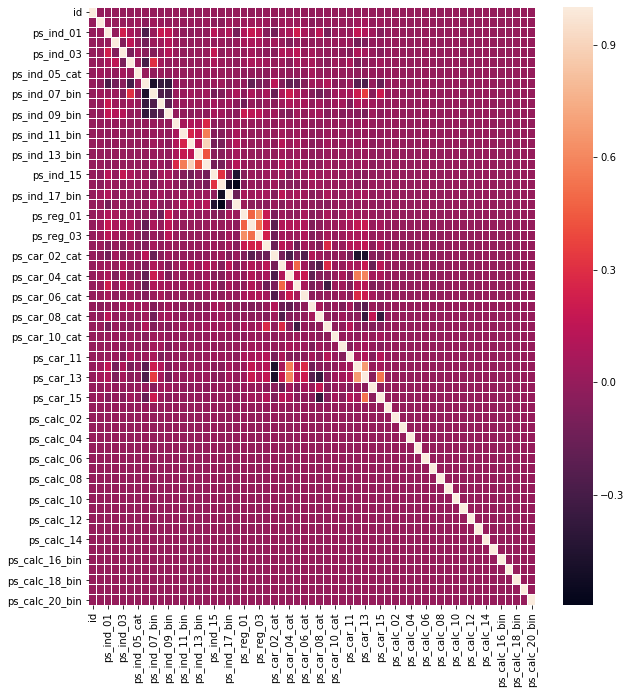

In [11]:
plt.figure(figsize=(10,11))
sns.heatmap(train.corr(),linewidths=0.01)
plt.show()

**Observations:**
   * This is the overall correlation matrix with respect to target variable. 
   * By looking at the color correlation,checking at the scale, we find few columns which are Lightly coloured are highly correlated with the target column. 
   * Hence it shall be removed which is of NO use and shall effect the overall score of the Machine Learning Model.

### Exploratory Data Analysis

## EDA on Categorical features

### Lets Check the Unique values of in Categorical values

In [13]:
for f in nominal_col:
    dist_values = train[f].nunique()
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable id has 216940 distinct values
Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_03_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_05_cat has 3 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


### Also Let's visualize the Categorical values with its Bar plots.

<Figure size 432x288 with 0 Axes>

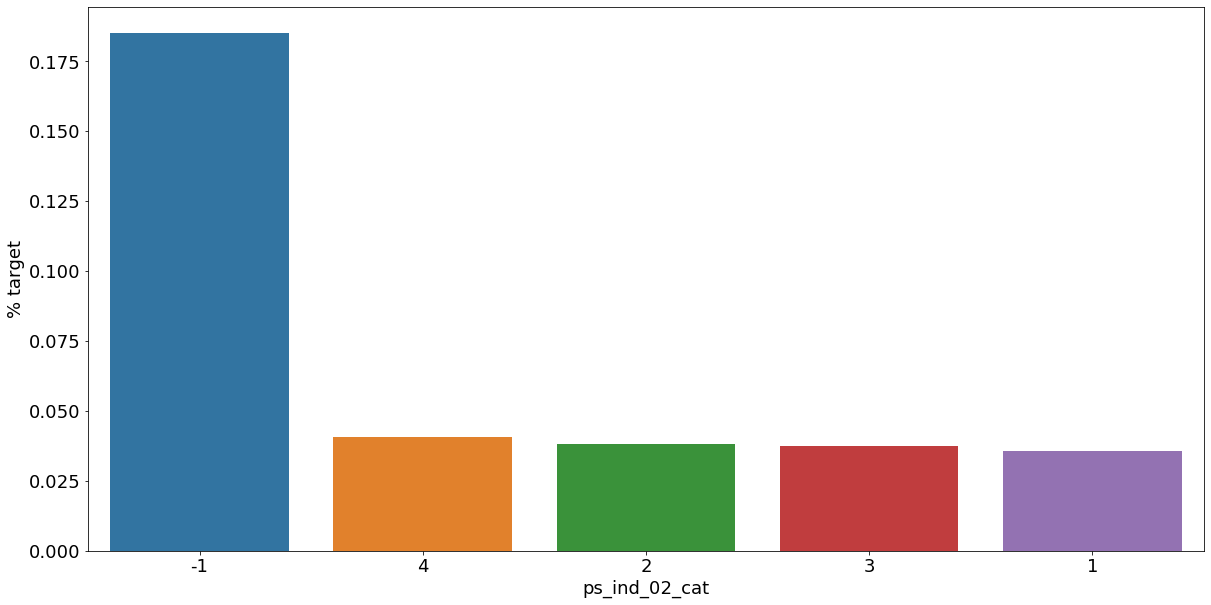

<Figure size 432x288 with 0 Axes>

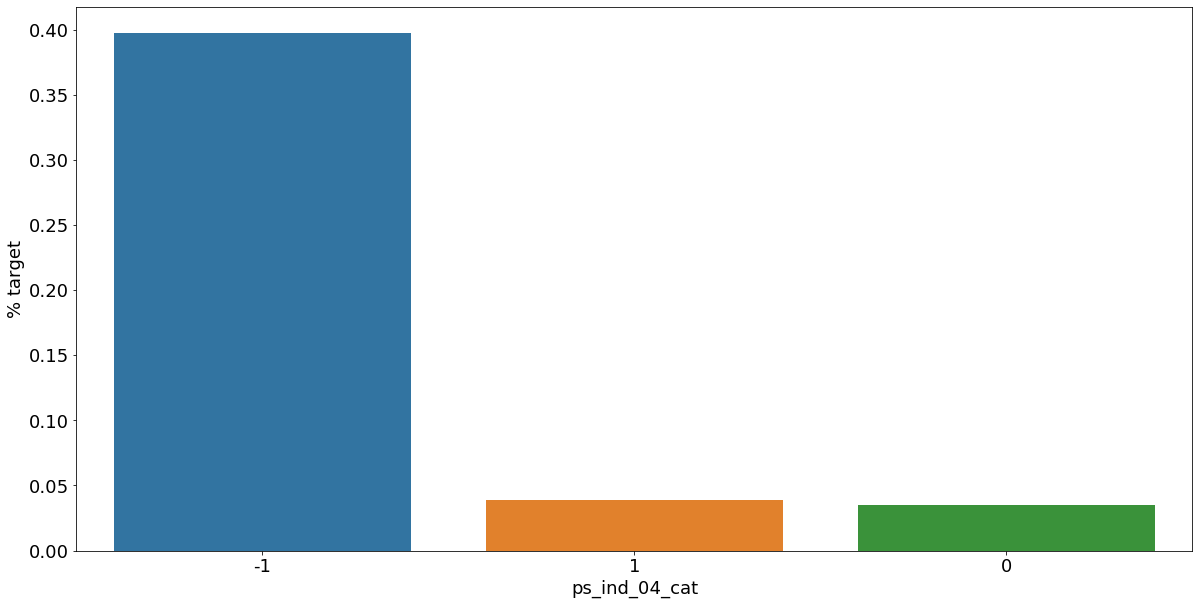

<Figure size 432x288 with 0 Axes>

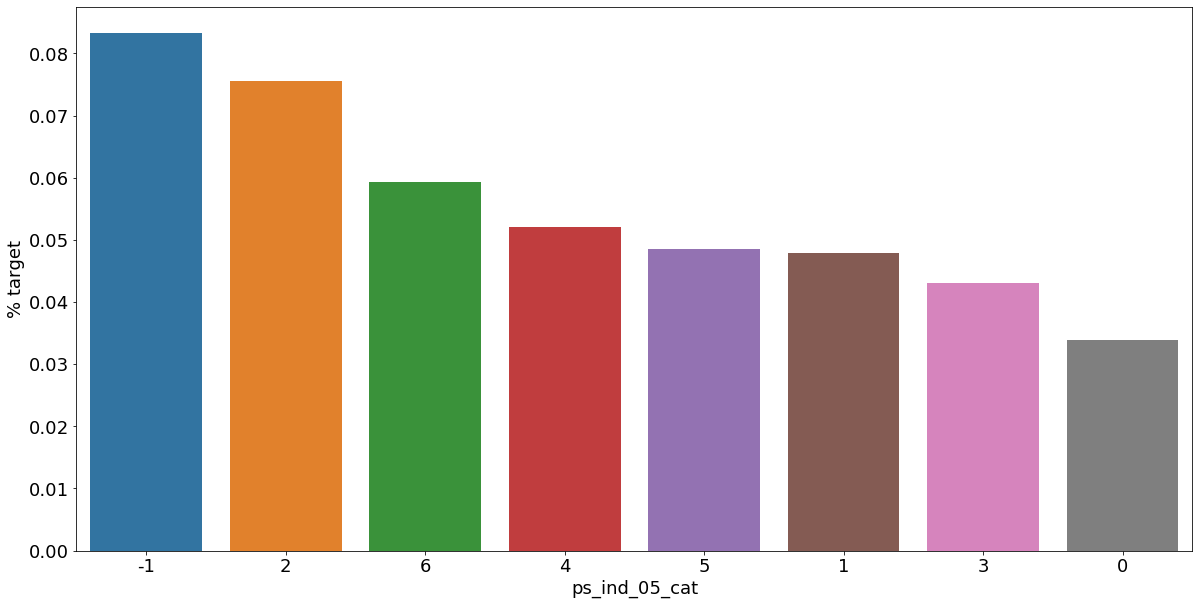

<Figure size 432x288 with 0 Axes>

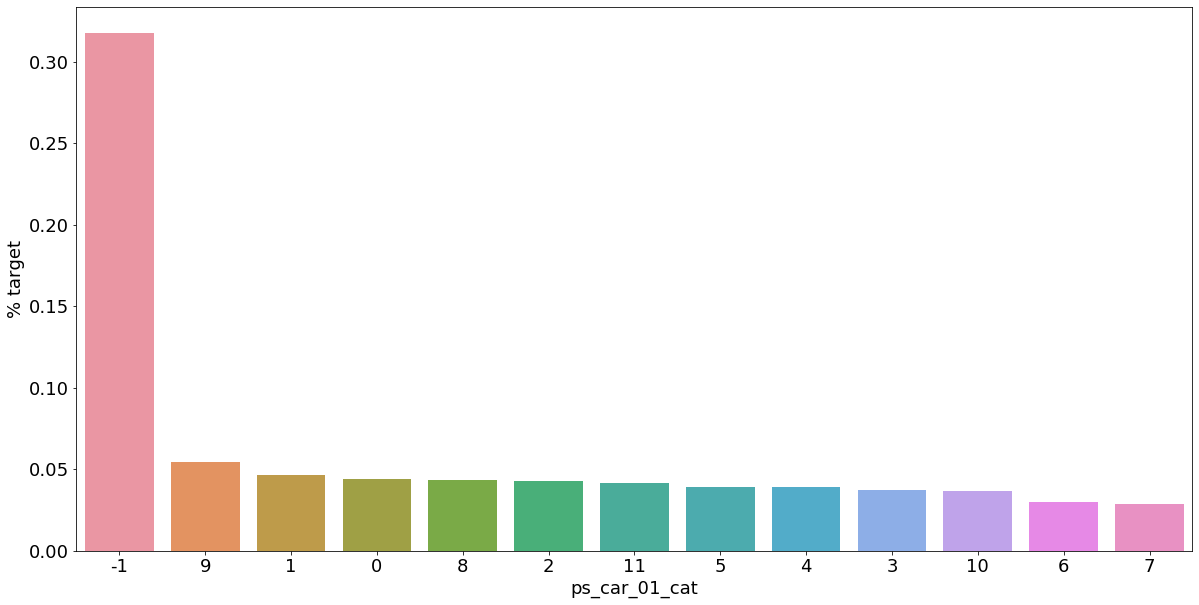

<Figure size 432x288 with 0 Axes>

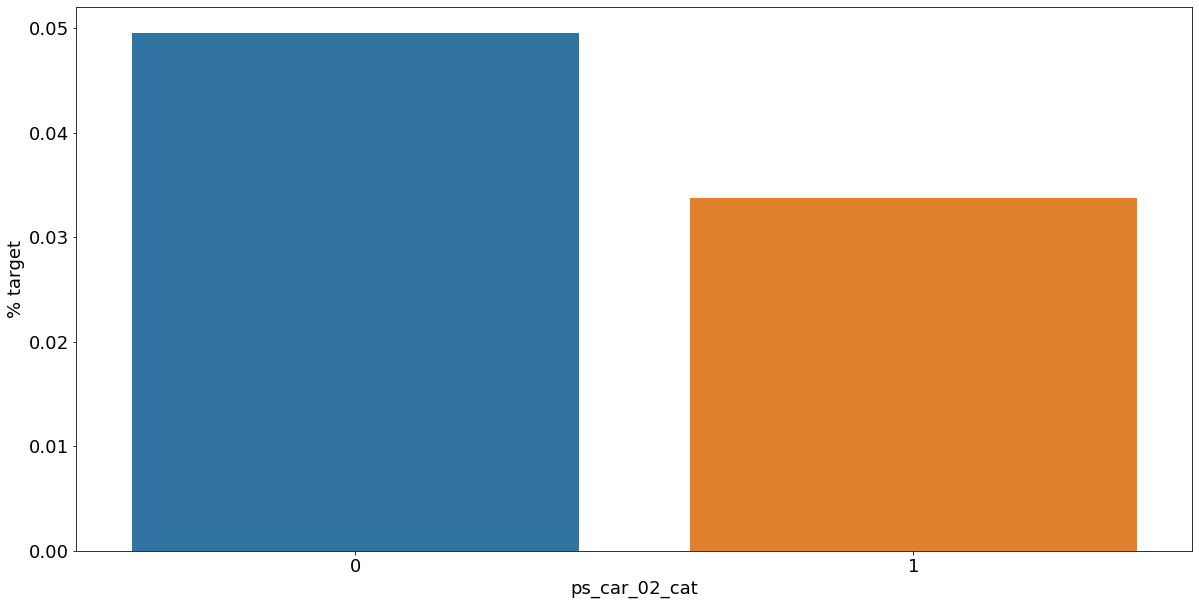

<Figure size 432x288 with 0 Axes>

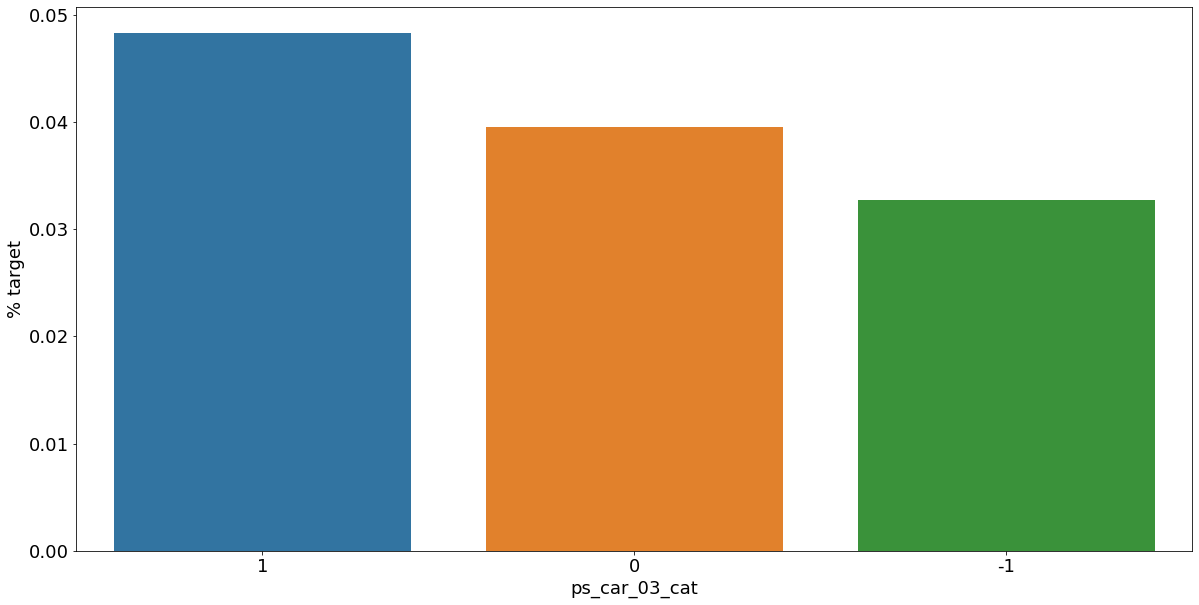

<Figure size 432x288 with 0 Axes>

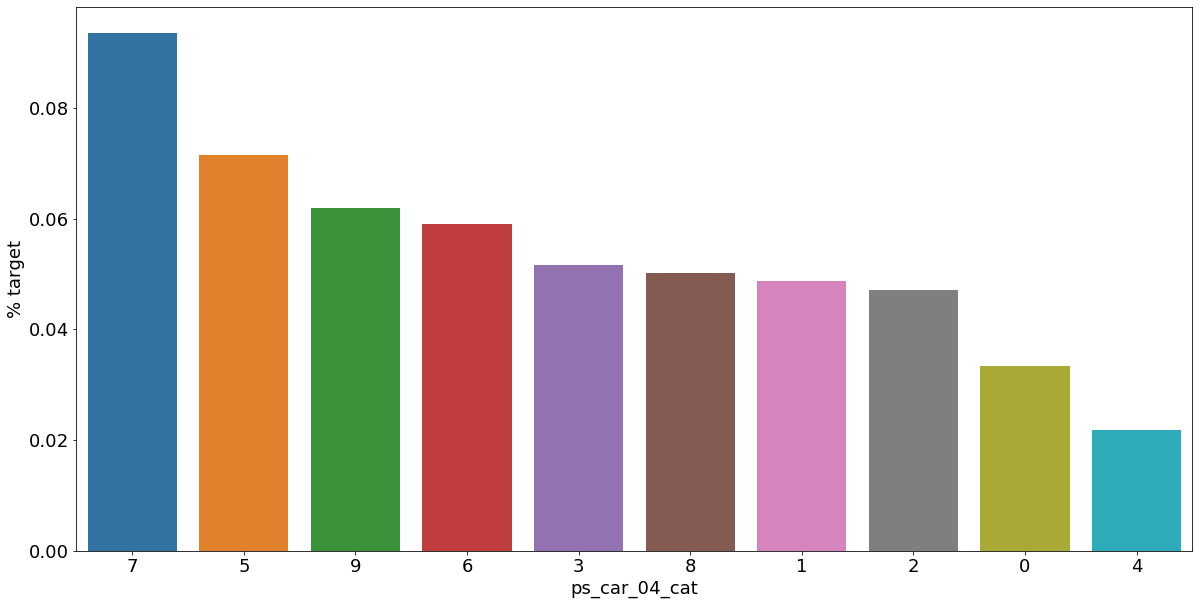

<Figure size 432x288 with 0 Axes>

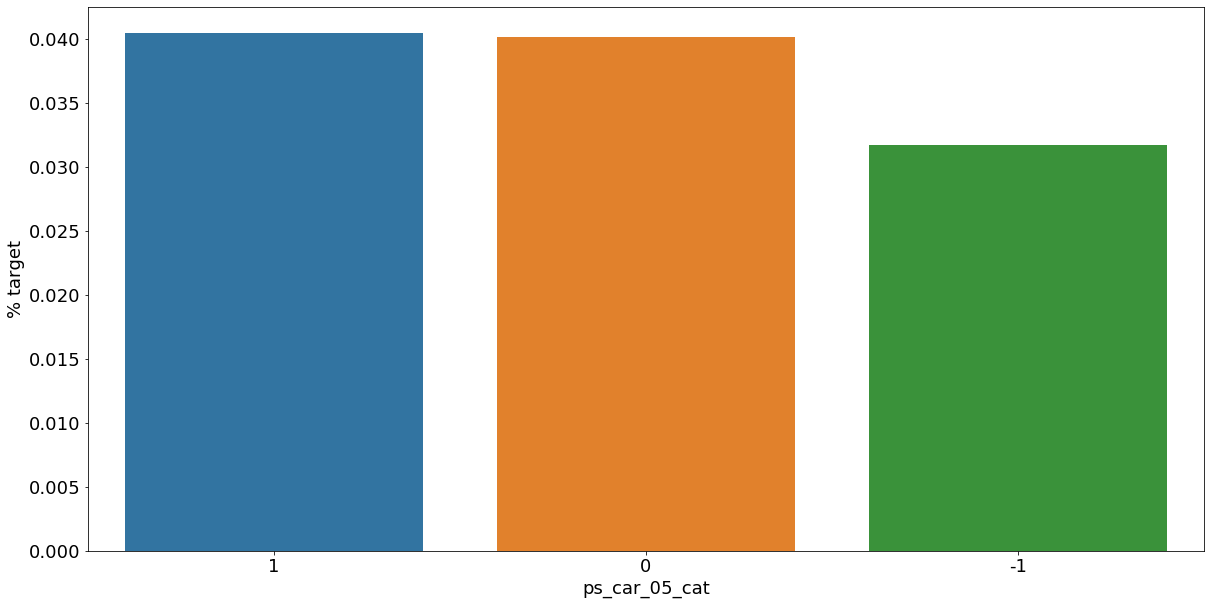

<Figure size 432x288 with 0 Axes>

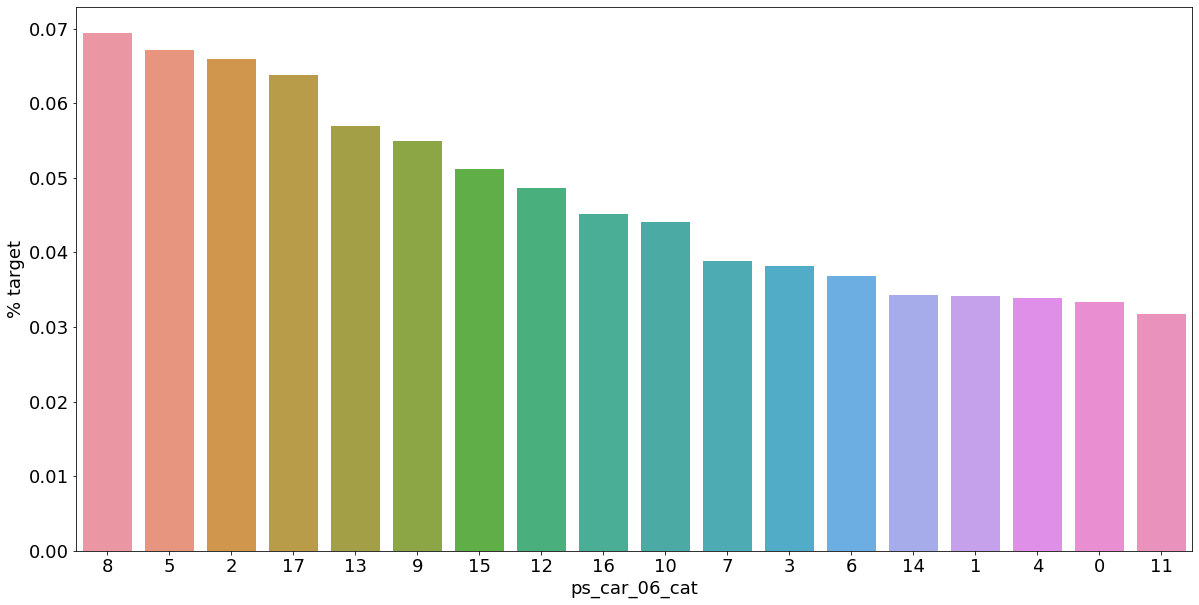

<Figure size 432x288 with 0 Axes>

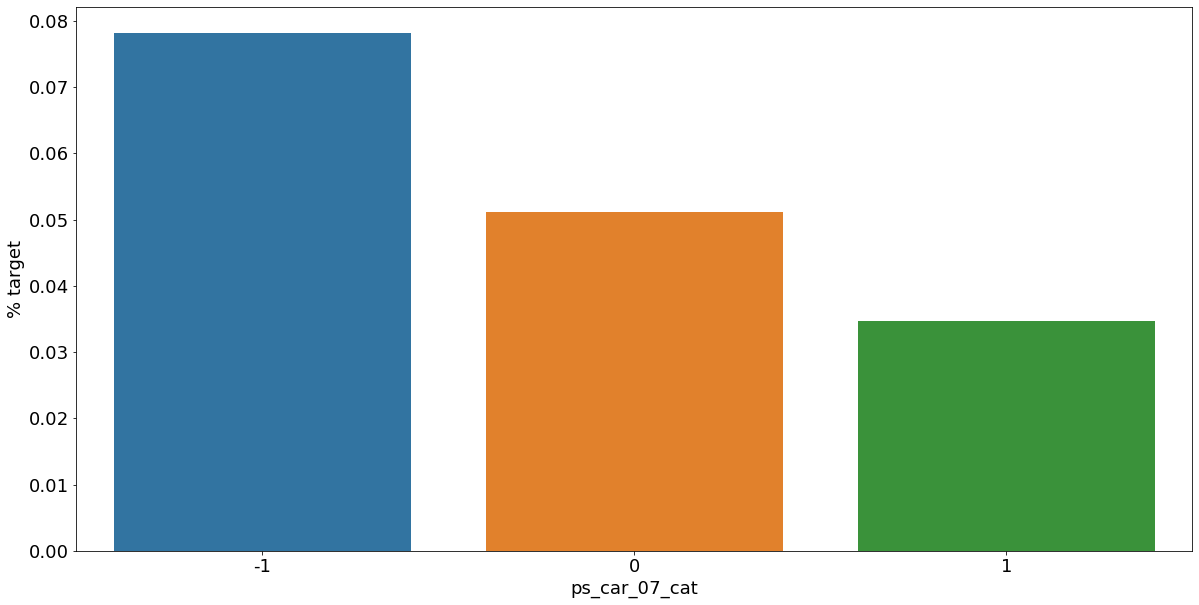

<Figure size 432x288 with 0 Axes>

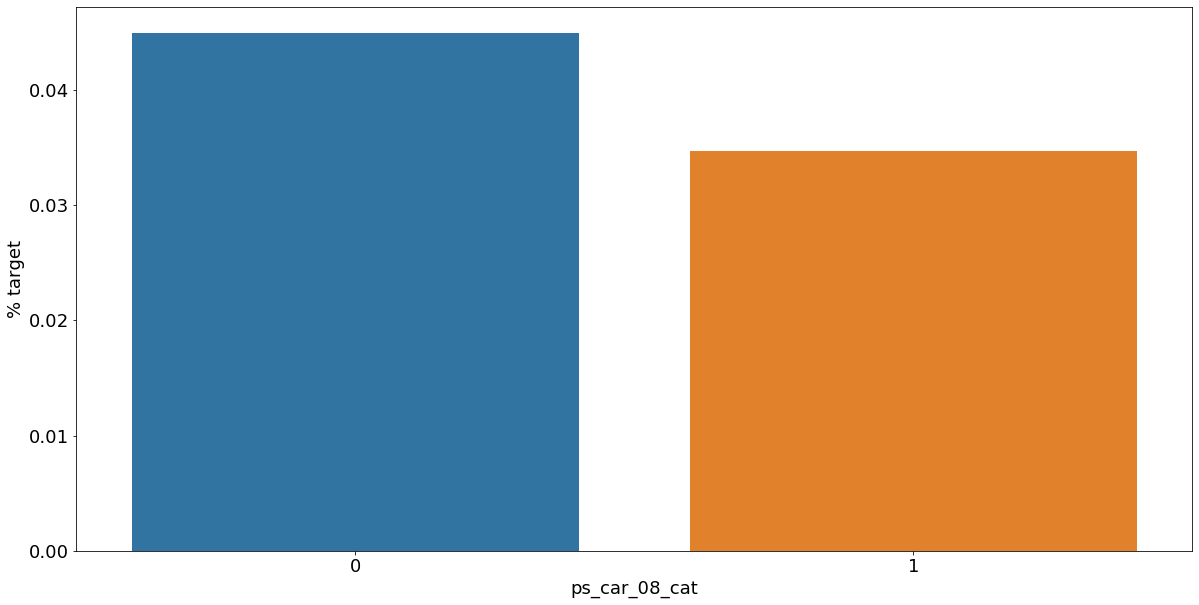

<Figure size 432x288 with 0 Axes>

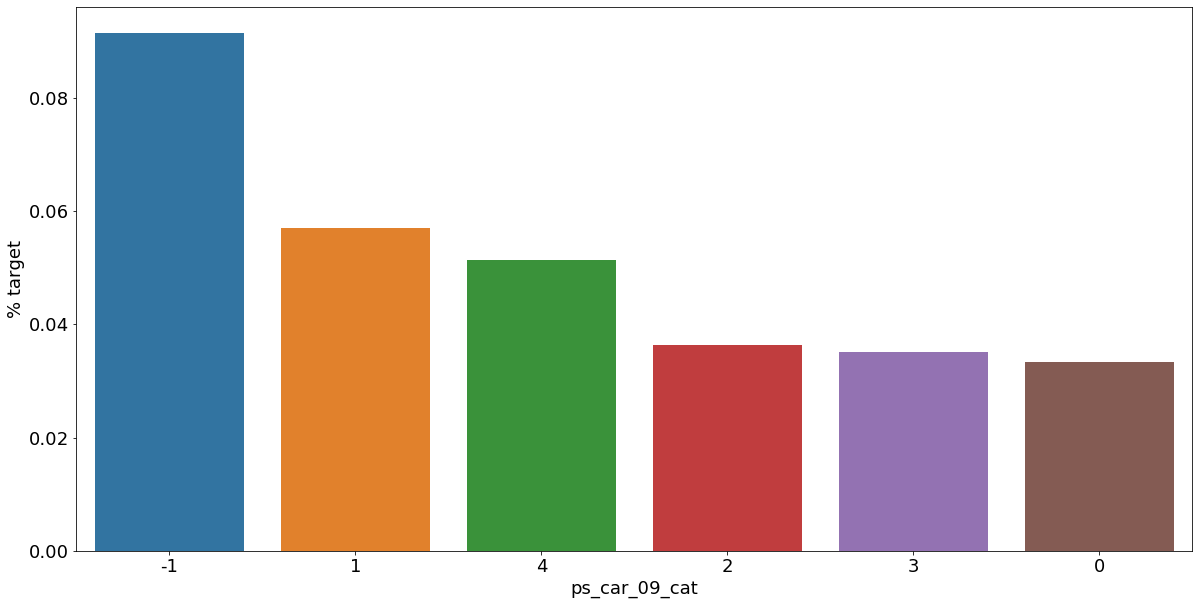

<Figure size 432x288 with 0 Axes>

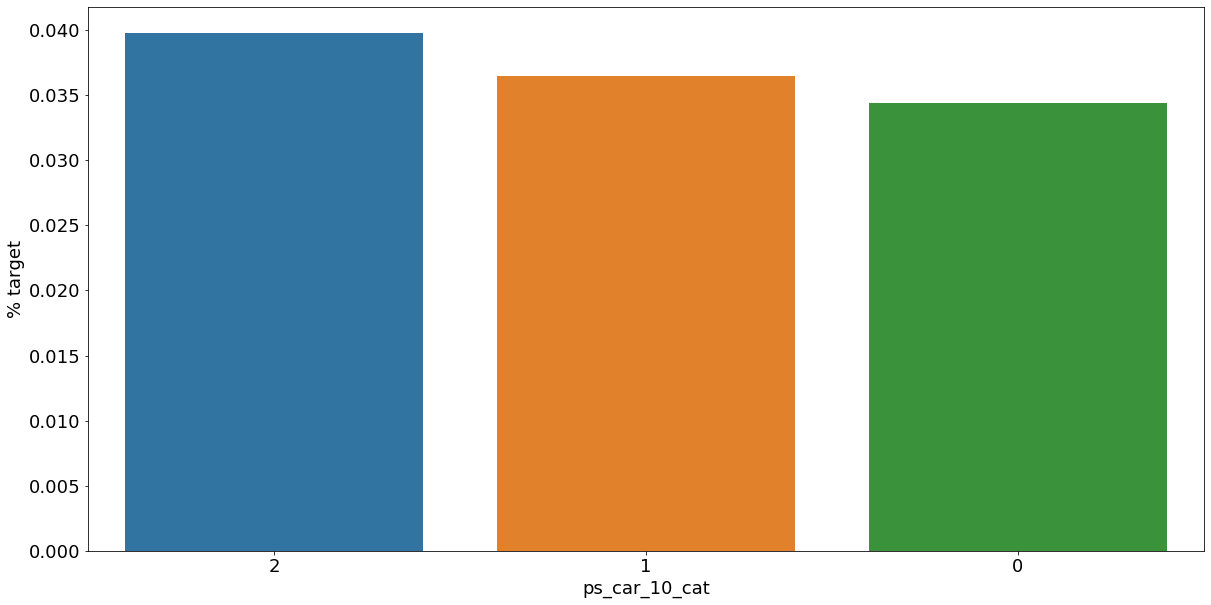

<Figure size 432x288 with 0 Axes>

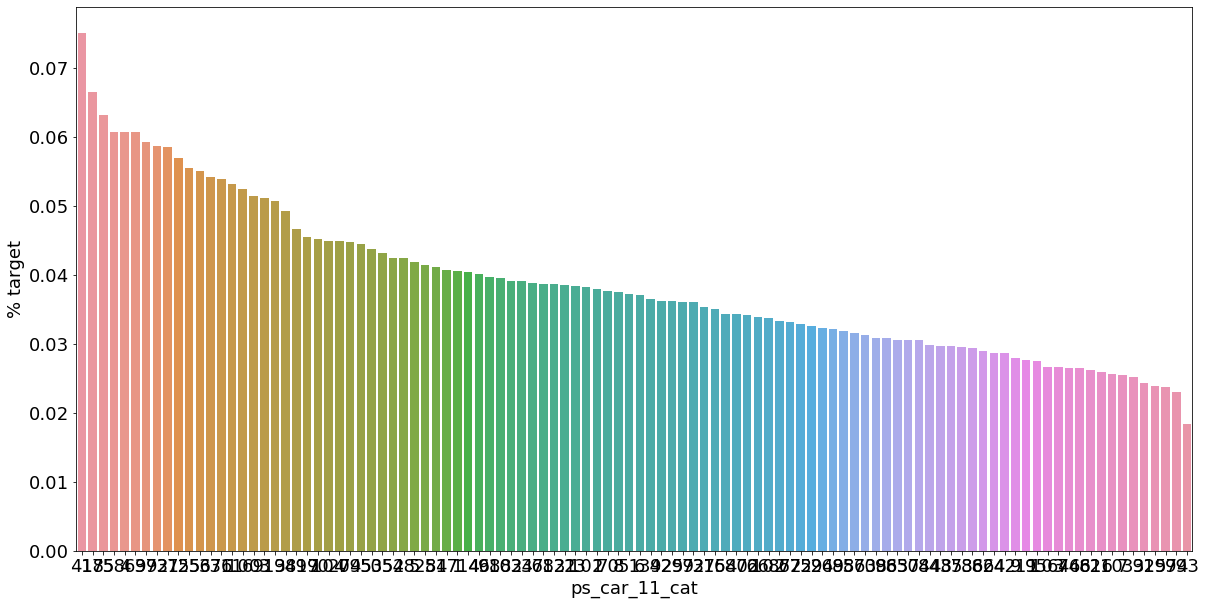

In [12]:
w = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat',\
     'ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat']
for f in w:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

> As we can see from the variables with missing values, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

### Also lets check the Corelation of Categorical values.

In [13]:
train[nominal_col+["target"]].corr()['target'].sort_values(ascending=False)

target           1.000000
ps_car_04_cat    0.032900
ps_car_03_cat    0.032401
ps_ind_05_cat    0.029165
ps_car_05_cat    0.020754
ps_car_01_cat    0.016256
ps_car_06_cat    0.011537
ps_ind_04_cat    0.009360
ps_car_11_cat    0.006129
ps_car_09_cat    0.005322
ps_ind_02_cat    0.004534
ps_car_10_cat    0.001038
id              -0.000188
ps_car_08_cat   -0.020342
ps_car_02_cat   -0.031545
ps_car_07_cat   -0.036395
Name: target, dtype: float64

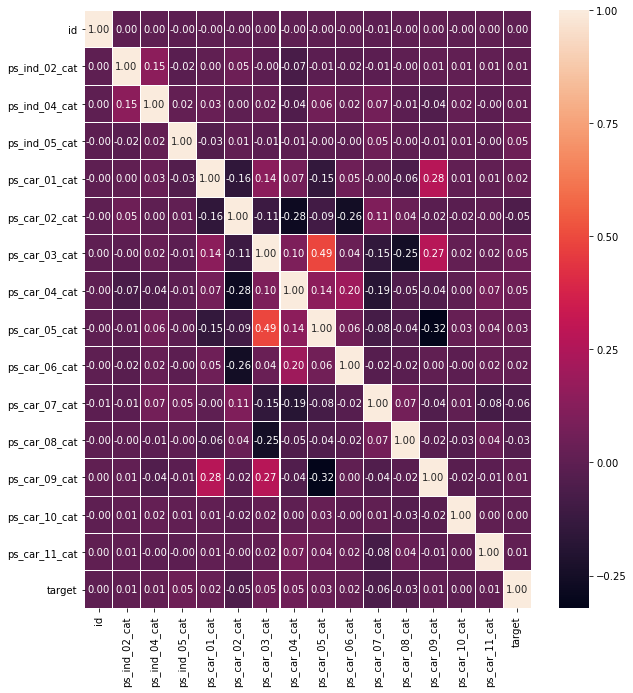

In [37]:
plt.figure(figsize=(10,11))
sns.heatmap(train[nominal_col+["target"]].corr(),annot=True,linewidths=0.01,fmt=".2f")
plt.show()

> We can see that all the features here Normal and moderately correlated. while ps_car_03_cat and ps_car_05_cat features seems highly correlated.

# EDA on Interval Features

### Let's check the Distinct features using cardinality

In [38]:
for f in interval_col:
    dist_values = train[f].nunique()
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_reg_01 has 10 distinct values
Variable ps_reg_02 has 19 distinct values
Variable ps_reg_03 has 4837 distinct values
Variable ps_car_12 has 165 distinct values
Variable ps_car_13 has 45966 distinct values
Variable ps_car_14 has 802 distinct values
Variable ps_car_15 has 15 distinct values
Variable ps_calc_01 has 10 distinct values
Variable ps_calc_02 has 10 distinct values
Variable ps_calc_03 has 10 distinct values


> ps_car_13 and ps_reg_03 features has highest distinct values. Which seems to be indicated as ouliers.

In [41]:
train[interval_col+["target"]].corr()['target'].sort_values(ascending=False)

target        1.000000
ps_car_13     0.085650
ps_car_12     0.061591
ps_reg_02     0.054261
ps_reg_03     0.048728
ps_car_15     0.045140
ps_reg_01     0.036960
ps_car_14     0.019040
ps_calc_01    0.002970
ps_calc_03    0.002820
ps_calc_02    0.002046
Name: target, dtype: float64

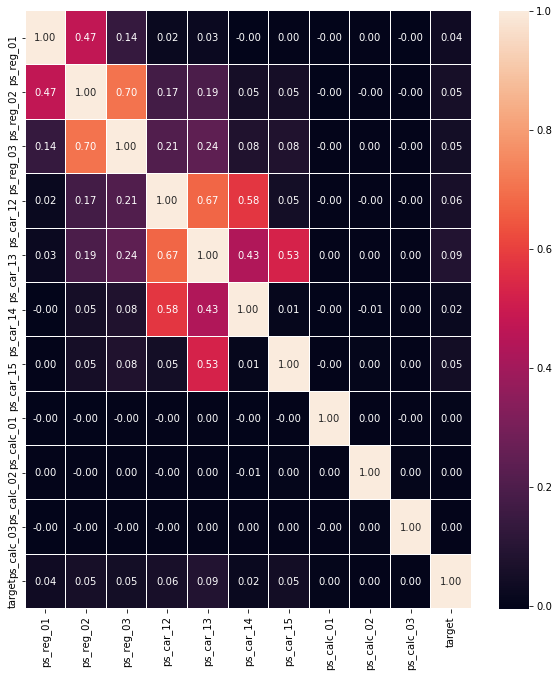

In [40]:
plt.figure(figsize=(10,11))
sns.heatmap(train[interval_col+["target"]].corr(),annot=True,linewidths=0.01,fmt=".2f")
plt.show()

> Its is clearly visible from above plot, the variables like ps_reg_02 , ps_car_13 and ps_car_12 are highly correlated with the target variable which can be handles to get the better accuracy.

### EDA for Binary varables

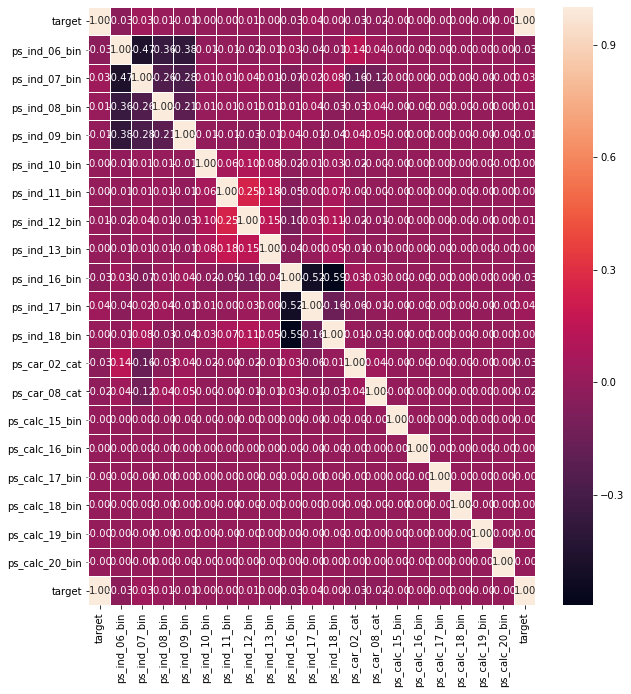

In [25]:
plt.figure(figsize=(10,11))
sns.heatmap(train[bin_col+["target"]].corr(),annot=True,linewidths=0.01,fmt=".2f")
plt.show()

> Highest corelation which i can see is between ps_ind_11_bin and ps_ind_12_bin which is 25%. None of the binary variables are co-related

### Inferences from the EDA

> ### Q14- ps_car_12 and ps_car_13 are the only two variable which has the highest co-relation

> ### ps_reg_01 and ps_reg_02 are correlated with around 47% and 70% from the plot above

> ### Q7 - None of binary features are equally balanced. This will help us with our model to get generalized better

> ### Q7 - None of the binary features are highly co-related

# Machine Learning Models

### Lets build the ML Model with the imbalanced datasets.

In [5]:
y = train['target']
x = train.drop(['id','target'], axis =1)

In [6]:
x.shape, y.shape

((595212, 57), (595212,))

In [7]:
from collections import Counter
Counter(y)

Counter({0: 573518, 1: 21694})

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((476169, 57), (119043, 57), (476169,), (119043,))

In [19]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred_trn = clf.predict(x_train)
y_pred_tst = clf.predict(x_test)
print("Train F1score:",f1_score(y_train, y_pred_trn))
print("Test F1score:",f1_score(y_test, y_pred_tst))
print("\n")
print("Train precision_score:",precision_score(y_train, y_pred_trn))
print("Test precision_score:",precision_score(y_test, y_pred_tst))
print("\n")
print("Train recall_score:",recall_score(y_train, y_pred_trn))
print("Test recall_score:",recall_score(y_test, y_pred_tst))

Train F1score: 0.0
Test F1score: 0.0


Train precision_score: 0.0
Test precision_score: 0.0


Train recall_score: 0.0
Test recall_score: 0.0


In [9]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


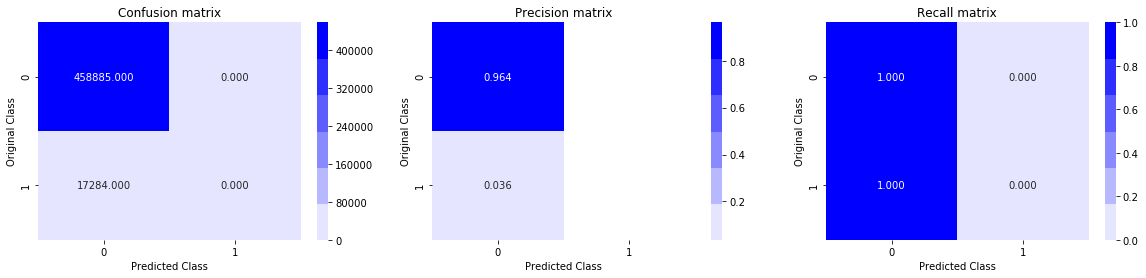

Test confusion_matrix


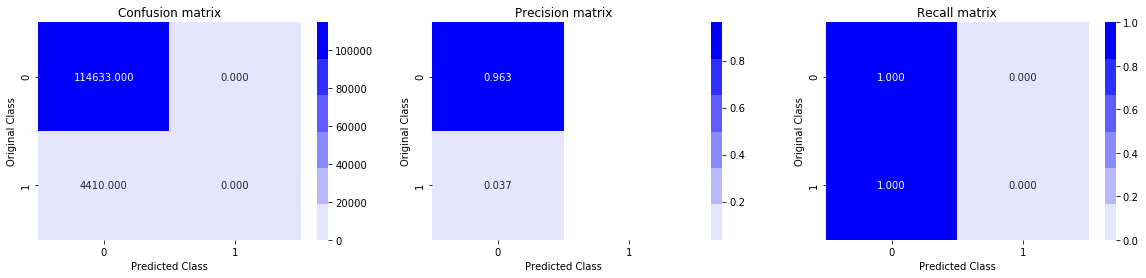

In [21]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,clf.predict(x_train))
print('Test confusion_matrix')
plot_confusion_matrix(y_test,clf.predict(x_test))

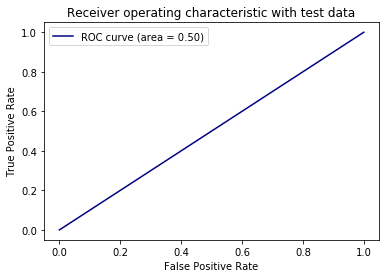

In [22]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,clf.predict(x_test))
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

**observations:**
   * Before dividing the data, total no of rows were 595212, col 53
   * In train and test, data was divided with 80/20 between train and test. 
   * AUC value is 0.5 which means our model isn't working well.
   * As we know the for the Imbalanced datasets, F1 score playes a major role because it deals with the False Positives and False Positivies.
   * Here from the confusion matrix we can see that the model is highly biased to the False Negatives, Hence the model is underfitting.

> ### Q1 - As the target data is not balanced, Logistic regression is not working as expected and being more bias on 0.

> ### Q2 - as precision and recall are 0's, F1 score is also 0 here. again this is only because of the target data not being balanced, logistic regression is not being able to generalize effectively with the available data

> ### Q3 - Both precision and recall is 0 for this model

> ### Q4 - The most important inference is as the target data is not balanced, our model is not working as expected. Target data balancing is quite critical in model training.

In [10]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.svm import LinearSVC

clf = LinearSVC(dual = False, max_iter=1000)
clf.fit(x_train,y_train)
y_pred_trn = clf.predict(x_train)
y_pred_tst = clf.predict(x_test)
print("Train F1score:",f1_score(y_train, y_pred_trn))
print("Test F1score:",f1_score(y_test, y_pred_tst))
print("\n")
print("Train precision_score:",precision_score(y_train, y_pred_trn))
print("Test precision_score:",precision_score(y_test, y_pred_tst))
print("\n")
print("Train recall_score:",recall_score(y_train, y_pred_trn))
print("Test recall_score:",recall_score(y_test, y_pred_tst))

Train F1score: 0.0
Test F1score: 0.0


Train precision_score: 0.0
Test precision_score: 0.0


Train recall_score: 0.0
Test recall_score: 0.0


Train confusion_matrix


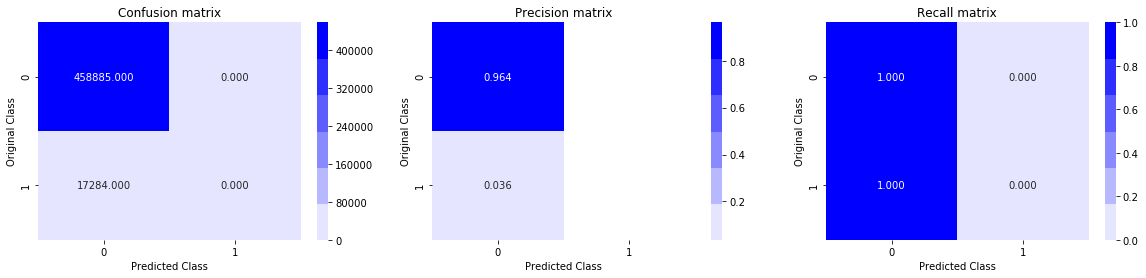

Test confusion_matrix


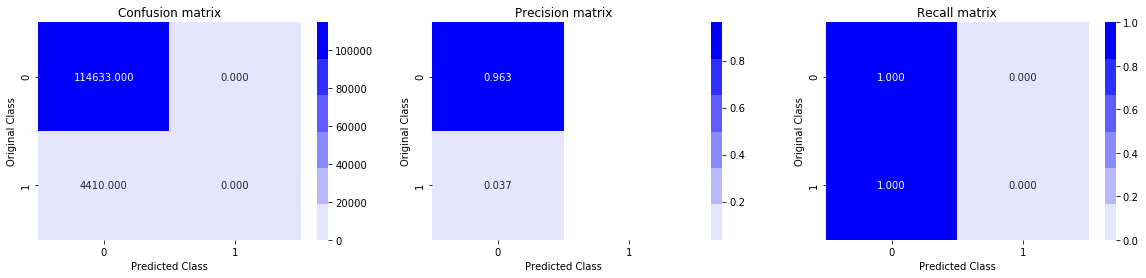

In [11]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,clf.predict(x_train))
print('Test confusion_matrix')
plot_confusion_matrix(y_test,clf.predict(x_test))

> Even Linear SVC model couldn;t handle the Imbalanced dataset and the resulted the model being underfitting as seen in the above confusion matrix.

## Balancing dataset with the SMOTE technique

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)

X , Y = sm.fit_sample(x,y) 

X.shape,Y.shape

Using TensorFlow backend.


((1147036, 57), (1147036,))

In [14]:
from collections import Counter
Counter(Y)

Counter({0: 573518, 1: 573518})

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 10)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((917628, 57), (229408, 57), (917628,), (229408,))

In [16]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
stand.fit(X_train)

X_train = stand.transform(X_train)
X_test = stand.transform(X_test)

### Simple LogisticRegression 

In [14]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,Y_train)
Y_pred_trn = clf.predict(X_train)
Y_pred_tst = clf.predict(X_test)
print("Train accuracy score:",accuracy_score(Y_train, Y_pred_trn))
print("Test accuracy score:",accuracy_score(Y_test, Y_pred_tst))
print("\n")
print("Train F1score:",f1_score(Y_train, Y_pred_trn))
print("Test F1score:",f1_score(Y_test, Y_pred_tst))
print("\n")
print("Train precision_score:",precision_score(Y_train, Y_pred_trn))
print("Test precision_score:",precision_score(Y_test, Y_pred_tst))
print("\n")
print("Train recall_score:",recall_score(Y_train, Y_pred_trn))
print("Test recall_score:",recall_score(Y_test, Y_pred_tst))

Train accuracy score: 0.5860403126321342
Test accuracy score: 0.5866709094713349


Train F1score: 0.575003048790721
Test F1score: 0.5764102014286288


Train precision_score: 0.5903225584136035
Test precision_score: 0.5928107397844324


Train recall_score: 0.5604585427135679
Test recall_score: 0.5608926987880579


Train confusion_matrix


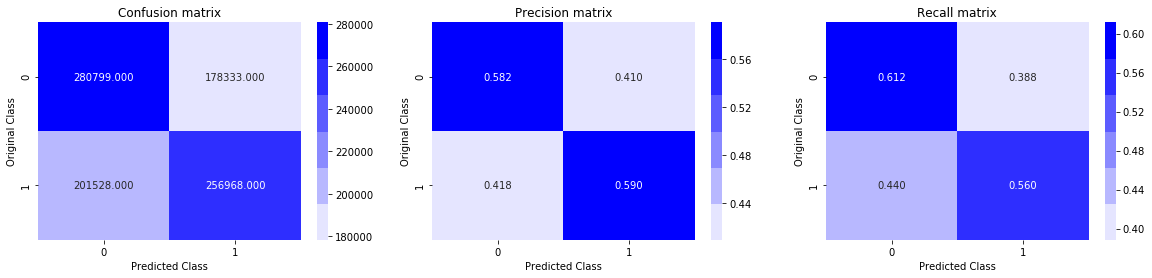

Test confusion_matrix


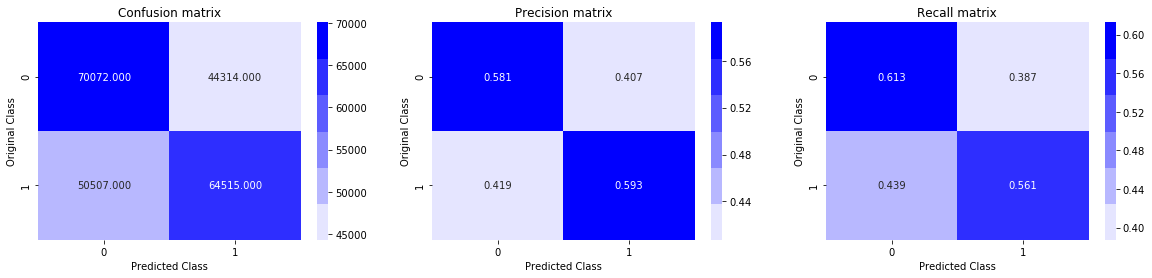

In [16]:
print('Train confusion_matrix')
plot_confusion_matrix(Y_train,clf.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(Y_test,clf.predict(X_test))

### Logistic regression with lgfgs solver

In [41]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train,Y_train)
Y_pred_trn = clf.predict(X_train)
Y_pred_tst = clf.predict(X_test)
print("Train accuracy score:",accuracy_score(Y_train, Y_pred_trn))
print("Test accuracy score:",accuracy_score(Y_test, Y_pred_tst))
print("\n")
print("Train F1score:",f1_score(Y_train, Y_pred_trn))
print("Test F1score:",f1_score(Y_test, Y_pred_tst))
print("\n")
print("Train precision_score:",precision_score(Y_train, Y_pred_trn))
print("Test precision_score:",precision_score(Y_test, Y_pred_tst))
print("\n")
print("Train recall_score:",recall_score(Y_train, Y_pred_trn))
print("Test recall_score:",recall_score(Y_test, Y_pred_tst))

Train accuracy score: 0.5860403126321342
Test accuracy score: 0.5866709094713349


Train F1score: 0.575003048790721
Test F1score: 0.5764102014286288


Train precision_score: 0.5903225584136035
Test precision_score: 0.5928107397844324


Train recall_score: 0.5604585427135679
Test recall_score: 0.5608926987880579


Train confusion_matrix


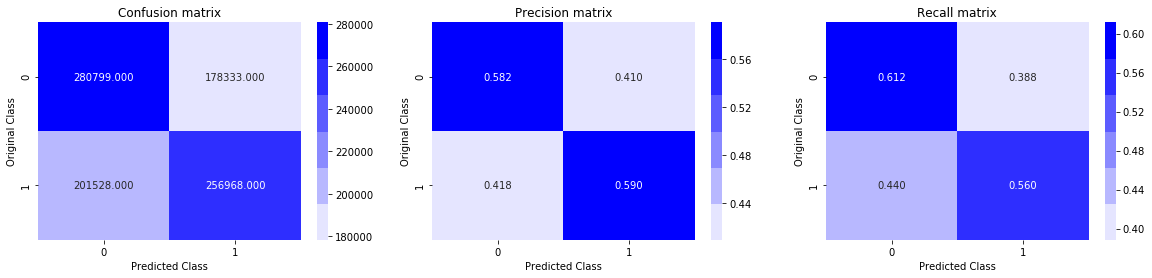

Test confusion_matrix


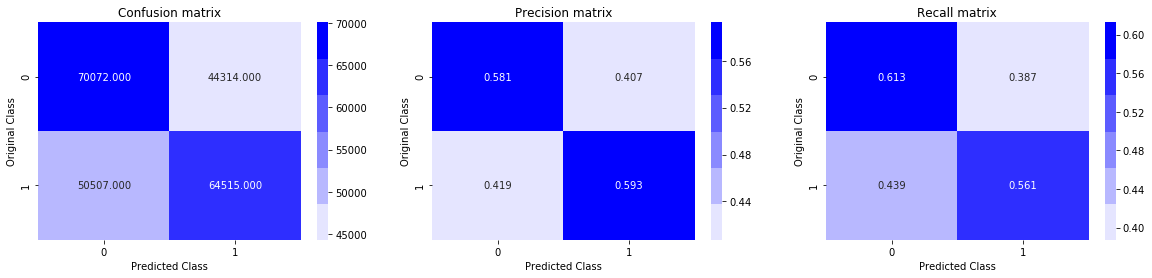

In [42]:
print('Train confusion_matrix')
plot_confusion_matrix(Y_train,clf.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(Y_test,clf.predict(X_test))

### Logistic regression with liblinear solver (L2 penalty)

In [43]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train,Y_train)
Y_pred_trn = clf.predict(X_train)
Y_pred_tst = clf.predict(X_test)
print("Train accuracy score:",accuracy_score(Y_train, Y_pred_trn))
print("Test accuracy score:",accuracy_score(Y_test, Y_pred_tst))
print("\n")
print("Train F1score:",f1_score(Y_train, Y_pred_trn))
print("Test F1score:",f1_score(Y_test, Y_pred_tst))
print("\n")
print("Train precision_score:",precision_score(Y_train, Y_pred_trn))
print("Test precision_score:",precision_score(Y_test, Y_pred_tst))
print("\n")
print("Train recall_score:",recall_score(Y_train, Y_pred_trn))
print("Test recall_score:",recall_score(Y_test, Y_pred_tst))

Train accuracy score: 0.5874842528780726
Test accuracy score: 0.5884276049658251


Train F1score: 0.5790180765902929
Test F1score: 0.5806700893570907


Train precision_score: 0.5907238391750893
Test precision_score: 0.5935338018194695


Train recall_score: 0.5677672215242882
Test recall_score: 0.5683521413294848


Train confusion_matrix


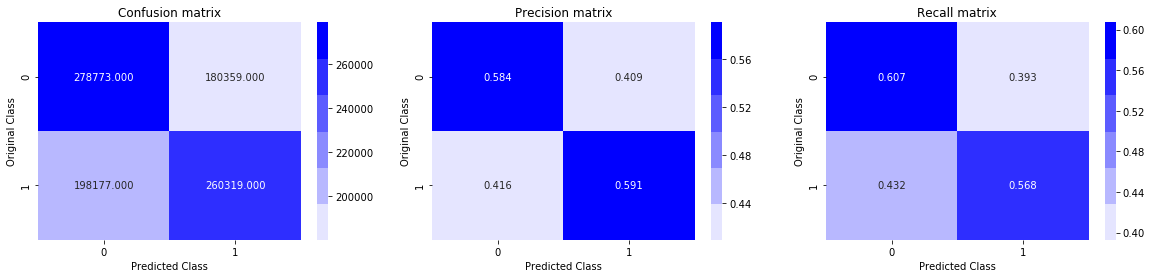

Test confusion_matrix


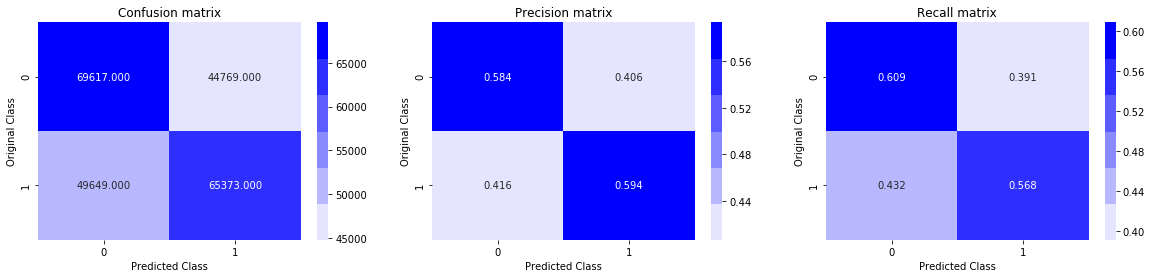

In [44]:
print('Train confusion_matrix')
plot_confusion_matrix(Y_train,clf.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(Y_test,clf.predict(X_test))

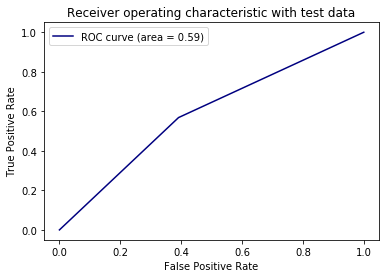

In [46]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(Y_test,clf.predict(X_test))
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

* Auc of 0.59, whcich is better results than the logistic regression model.

> ### Q7 - Linearsvc with same features gave similar results compared to the Logistic regression. F1 score of 57.3%

> ### Q8 - Limiting the features made the model more conservative and results to the model undersitting and the performance of the moel decreases gradually.

### Random Forest Classifier

In [24]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
clf.fit(X_train,Y_train)
Y_pred_trn = clf.predict(X_train)
Y_pred_tst = clf.predict(X_test)
print("Train accuracy score:",accuracy_score(Y_train, Y_pred_trn))
print("Test accuracy score:",accuracy_score(Y_test, Y_pred_tst))
print("\n")
print("Train F1score:",f1_score(Y_train, Y_pred_trn))
print("Test F1score:",f1_score(Y_test, Y_pred_tst))
print("\n")
print("Train precision_score:",precision_score(Y_train, Y_pred_trn))
print("Test precision_score:",precision_score(Y_test, Y_pred_tst))
print("\n")
print("Train recall_score:",recall_score(Y_train, Y_pred_trn))
print("Test recall_score:",recall_score(Y_test, Y_pred_tst))

Train accuracy score: 0.9297416818144172
Test accuracy score: 0.9293267889524341


Train F1score: 0.927397767800334
Test F1score: 0.9272519238103785


Train precision_score: 0.9586945032327762
Test precision_score: 0.958115037600957


Train recall_score: 0.8980798087660525
Test recall_score: 0.898315104936447


Train confusion_matrix


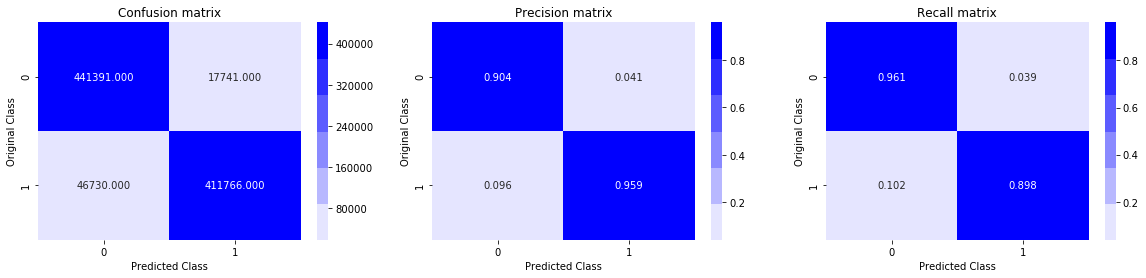

Test confusion_matrix


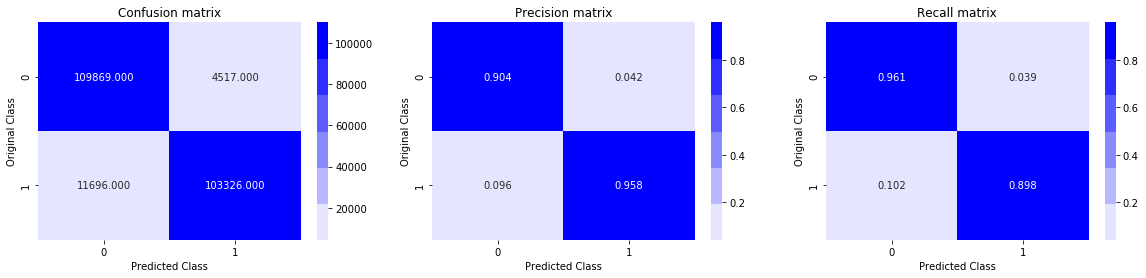

In [25]:
print('Train confusion_matrix')
plot_confusion_matrix(Y_train,clf.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(Y_test,clf.predict(X_test))

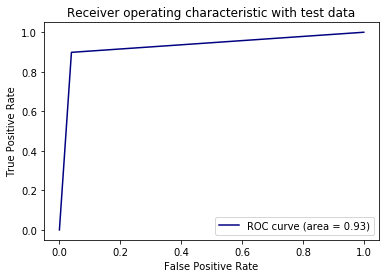

In [26]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(Y_test,Y_pred_tst)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

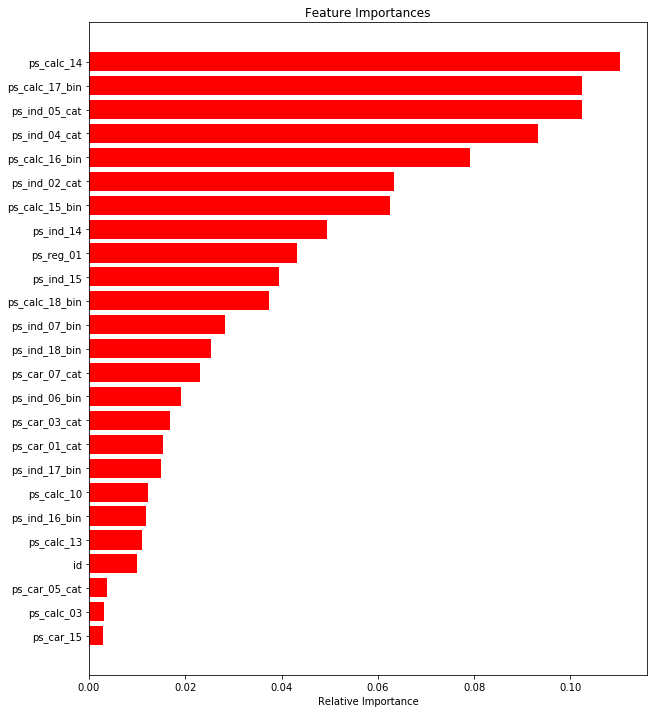

In [30]:
features = train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Adaboost Classifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100,random_state=25)
clf.fit(X_train,Y_train)
Y_pred_trn = clf.predict(X_train)
Y_pred_tst = clf.predict(X_test)
print("Train accuracy score:",accuracy_score(Y_train, Y_pred_trn))
print("Test accuracy score:",accuracy_score(Y_test, Y_pred_tst))
print("\n")
print("Train F1score:",f1_score(Y_train, Y_pred_trn))
print("Test F1score:",f1_score(Y_test, Y_pred_tst))
print("\n")
print("Train precision_score:",precision_score(Y_train, Y_pred_trn))
print("Test precision_score:",precision_score(Y_test, Y_pred_tst))
print("\n")
print("Train recall_score:",recall_score(Y_train, Y_pred_trn))
print("Test recall_score:",recall_score(Y_test, Y_pred_tst))

Train accuracy score: 0.9764719472378786
Test accuracy score: 0.9763826893569536


Train F1score: 0.9758881406283156
Test F1score: 0.9758805513016846


Train precision_score: 0.9999908448802282
Test precision_score: 0.9999726302344677


Train recall_score: 0.952919981853713
Test recall_score: 0.952922049694841


Train confusion_matrix


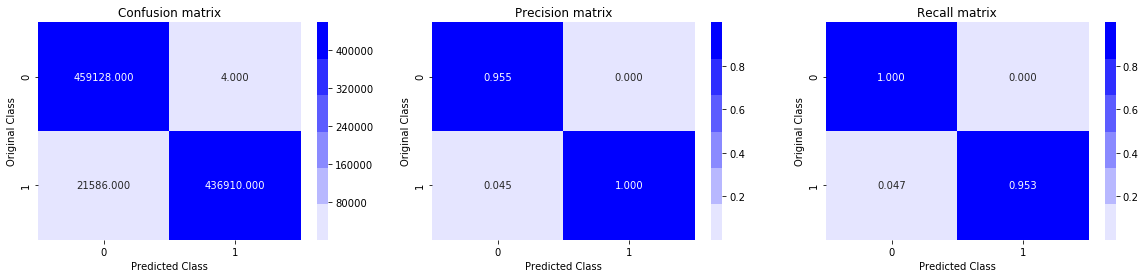

Test confusion_matrix


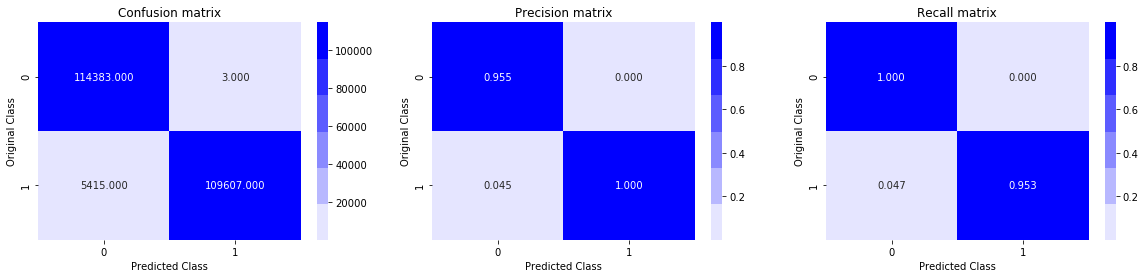

In [33]:
print('Train confusion_matrix')
plot_confusion_matrix(Y_train,clf.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(Y_test,clf.predict(X_test))

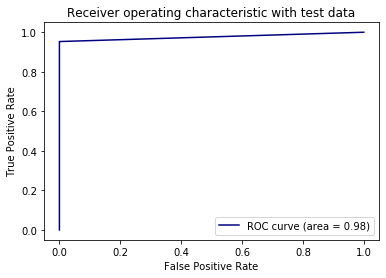

In [34]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(Y_test,Y_pred_tst)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

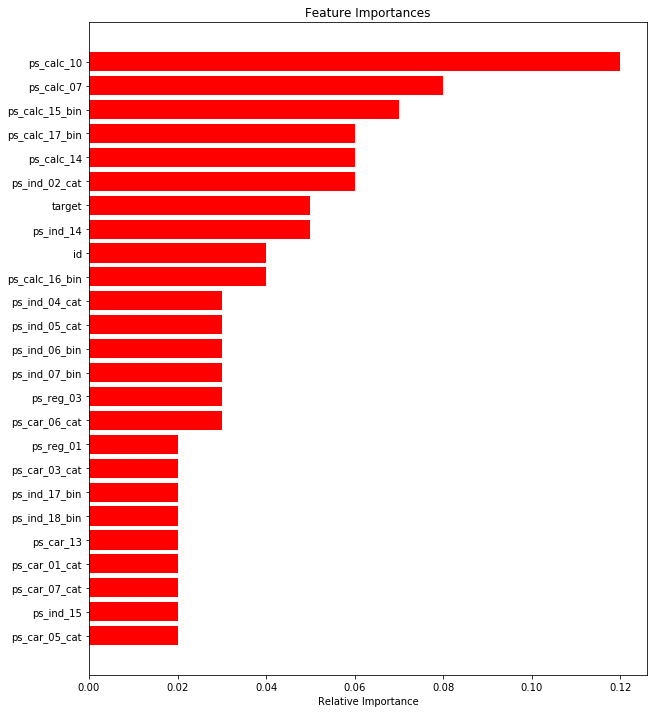

In [35]:
features = train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

In [36]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100,random_state=25,learning_rate =0.05)
clf.fit(X_train,Y_train)
Y_pred_trn = clf.predict(X_train)
Y_pred_tst = clf.predict(X_test)
print("Train accuracy score:",accuracy_score(Y_train, Y_pred_trn))
print("Test accuracy score:",accuracy_score(Y_test, Y_pred_tst))
print("\n")
print("Train F1score:",f1_score(Y_train, Y_pred_trn))
print("Test F1score:",f1_score(Y_test, Y_pred_tst))
print("\n")
print("Train precision_score:",precision_score(Y_train, Y_pred_trn))
print("Test precision_score:",precision_score(Y_test, Y_pred_tst))
print("\n")
print("Train recall_score:",recall_score(Y_train, Y_pred_trn))
print("Test recall_score:",recall_score(Y_test, Y_pred_tst))

Train accuracy score: 0.9758594986203559
Test accuracy score: 0.9756983191519041


Train F1score: 0.9752447364892047
Test F1score: 0.9751636083378996


Train precision_score: 1.0
Test precision_score: 1.0


Train recall_score: 0.9516855108877722
Test recall_score: 0.9515310114586775


Train confusion_matrix


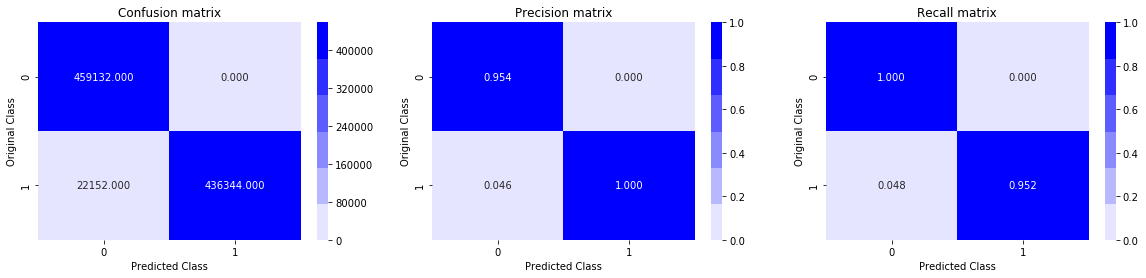

Test confusion_matrix


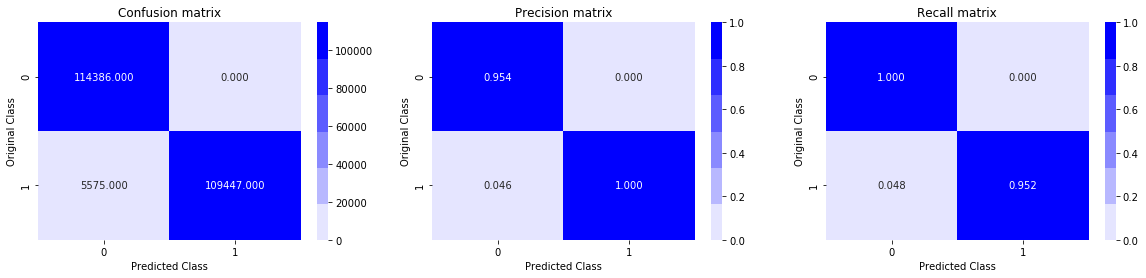

In [37]:
print('Train confusion_matrix')
plot_confusion_matrix(Y_train,clf.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(Y_test,clf.predict(X_test))

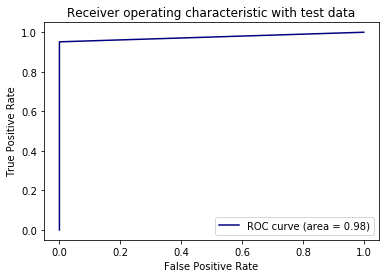

In [38]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(Y_test,Y_pred_tst)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

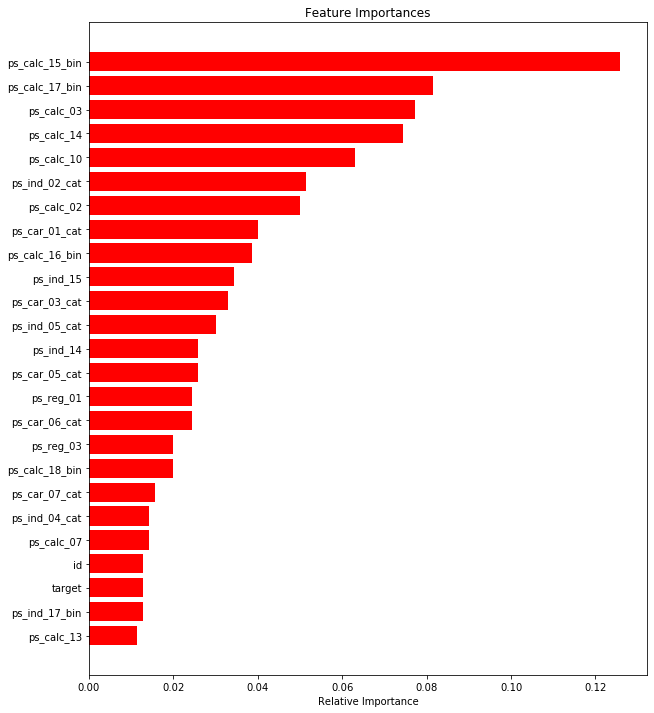

In [39]:
features = train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
print("Train F1 Score: ",f1_score(Y_train,clf.predict(X_train), average = 'micro'))
print("Test F1 Score: ",f1_score(Y_test,clf.predict(X_test), average = 'micro'))

Train F1 Score:  0.9758594986203559
Test F1 Score:  0.9756983191519041


> ### Q9 - XGBoost is one the better classifiers -- but still f1-score is very low. because of the error control than the Adboost algorithm. To the concept of XGboost it performs well in case of the False Negatives and False Positives. But still Adaboost gives better selection of Feature Importances. 

### MLP classification model

In [17]:
from keras.models import Sequential
from keras.initializers import RandomNormal
from keras.layers import Activation, Dense, Dropout
from keras.layers.normalization import BatchNormalization

In [18]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [19]:
model = Sequential()
model.add(Dense(300, activation="relu", input_shape = (X_train.shape[1],)))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(150,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=10 , verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               17400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               45150     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150)               600       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 64,501
Trainable params: 63,601
Non-trainable params: 900
_________________________________________________________________
None
Instructions for updating:
Use tf.cas

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 7.949093868117533
Test accuracy: 0.5013861656188965


* Looking at the scores of the MLP model it is clear that the above model is underfitting and it isn't allowing it to learn anything new for every new epochs. 
* Changing the architecture we can make it better. But getting the results of the Traditional ML models is slightly challanging.

> ### Q15 - MLP Classification model couldn't perform well than the traditional model.

### Inferences to the other questions

* To the given Features the model is able to perform with 0.97 F1 score and AUC 0.98 score. which is much satisfying results compared to the other models.
* We need not go for the One hot encoding techniques of categorical variables. Even after applying we got the model performace much lesser than the given training data.


# Conclusion

In [23]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "Train f1-Score","Test f1-Score"]
x.add_row(['logistic regression(unbalanced)','0','0'])
x.add_row(['LinearSVC(unbalanced)','0','0'])
x.add_row(['logistic Regression(balanced)','0.57','0.57'])
x.add_row(['LG(Liblinear)','0.57','0.58'])
x.add_row(['Random Forest','0.975','0.975'])
x.add_row(['XGBOOST','0.9752','0.951'])
print(x)

+---------------------------------+----------------+---------------+
|              Model              | Train f1-Score | Test f1-Score |
+---------------------------------+----------------+---------------+
| logistic regression(unbalanced) |       0        |       0       |
|      LinearSVC(unbalanced)      |       0        |       0       |
|  logistic Regression(balanced)  |      0.57      |      0.57     |
|          LG(Liblinear)          |      0.57      |      0.58     |
|          Random Forest          |     0.975      |     0.975     |
|             XGBOOST             |     0.9752     |     0.951     |
+---------------------------------+----------------+---------------+
